# ExecTimer

In [8]:
import numpy as np
import time


import sys
sys.path.append('..')

from astroLuSt.monitoring import timers, errorlogging

import importlib
# importlib.reload(errorlogging)

## Standard Usage

In [12]:


importlib.reload(timers)

ET = timers.ExecTimer(verbose=1)

ET.checkpoint_start('Sup Task', comment='Global Task')

ET.checkpoint_start('Sub Task1')
time.sleep(2)
ET.checkpoint_end('Sub Task1')
ET.checkpoint_start('Sub Task2')
time.sleep(3)
ET.checkpoint_end('Sub Task2', comment='TEST')

ET.checkpoint_end('Sup Task')

ET.estimate_runtime('Sup Task', nrepeats=4, ndone=1)

ET.df_protocoll



######################################################################
INFO: Started Sup Task at 2023-06-13T14:57:36

######################################################################
INFO: Started Sub Task1 at 2023-06-13T14:57:36

INFO: Finished Sub Task1 at 2023-06-13T14:57:38
Required time: 0 days 00:00:02
######################################################################

######################################################################
INFO: Started Sub Task2 at 2023-06-13T14:57:38

INFO: Finished Sub Task2 at 2023-06-13T14:57:41
Required time: 0 days 00:00:03
######################################################################

INFO: Finished Sup Task at 2023-06-13T14:57:41
Required time: 0 days 00:00:05
######################################################################
INFO: Total estimated runtime for 4 repeats: 0 days 00:00:20


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Sup Task,2023-06-13 14:57:36,2023-06-13 14:57:41,0 days 00:00:05,1.686668e+09,1.686668e+09,5.014747,Global Task,
1,Sub Task1,2023-06-13 14:57:36,2023-06-13 14:57:38,0 days 00:00:02,1.686668e+09,1.686668e+09,2.003627,,
2,Sub Task2,2023-06-13 14:57:38,2023-06-13 14:57:41,0 days 00:00:03,1.686668e+09,1.686668e+09,3.005775,,TEST


## Usage to have an up-to-date estimate of runtimes

In [13]:

#initialize the timer
ET = timers.ExecTimer(verbose=0)

repeats = 5 #number of times to repeat the loop


#Execute some loop
ET.checkpoint_start('Global Task')  #to monitor total (actual) duration
for idx in range(repeats):

    #monitor duration of each loop-execution
    ET.checkpoint_start(f'Subtask{idx}')

    #generate random sleeptime (should average out to be 1)
    time.sleep(np.random.normal(1, 0.5, size=1)[0])
    
    ET.checkpoint_end(f'Subtask{idx}')

    #estimate the runtime from the current point of view
    ET.estimate_runtime(r'Subtask', repeats, idx+1)

ET.checkpoint_end('Global Task')

ET.df_protocoll

INFO: Total estimated runtime for 5 repeats: 0 days 00:00:05
INFO: Total estimated runtime for 5 repeats: 0 days 00:00:05
INFO: Total estimated runtime for 5 repeats: 0 days 00:00:06.666666666
INFO: Total estimated runtime for 5 repeats: 0 days 00:00:05
INFO: Total estimated runtime for 5 repeats: 0 days 00:00:06


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2023-06-13 14:57:41,2023-06-13 14:57:47,0 days 00:00:06,1.686668e+09,1.686668e+09,5.588538,,
1,Subtask0,2023-06-13 14:57:41,2023-06-13 14:57:42,0 days 00:00:01,1.686668e+09,1.686668e+09,1.377301,,
2,Subtask1,2023-06-13 14:57:42,2023-06-13 14:57:43,0 days 00:00:01,1.686668e+09,1.686668e+09,0.980361,,
3,Subtask2,2023-06-13 14:57:43,2023-06-13 14:57:45,0 days 00:00:02,1.686668e+09,1.686668e+09,1.619006,,
4,Subtask3,2023-06-13 14:57:45,2023-06-13 14:57:45,0 days 00:00:00,1.686668e+09,1.686668e+09,0.385806,,
5,Subtask4,2023-06-13 14:57:45,2023-06-13 14:57:47,0 days 00:00:02,1.686668e+09,1.686668e+09,1.209774,,


## Usage as decorator

### Timing one function

In [14]:
ET.verbose = 1
@ET.time_exec(start_kwargs={'comment':'timed_func'})
def timed_func():
    time.sleep(np.random.rand())
    return 'FINISHED'
tf = timed_func()



######################################################################
INFO: Started Decorator Task at 2023-06-13T14:57:47

INFO: Finished Decorator Task at 2023-06-13T14:57:47
Required time: 0 days 00:00:00
######################################################################


### Getting execution statistics


######################################################################
INFO: Started get_execstats() at 2023-06-13T14:57:58

INFO: Finished get_execstats() at 2023-06-13T14:57:59
Required time: 0 days 00:00:01
######################################################################

######################################################################
INFO: Started get_execstats()1 at 2023-06-13T14:57:59

INFO: Finished get_execstats()1 at 2023-06-13T14:58:00
Required time: 0 days 00:00:01
######################################################################

######################################################################
INFO: Started get_execstats()2 at 2023-06-13T14:58:00

INFO: Finished get_execstats()2 at 2023-06-13T14:58:00
Required time: 0 days 00:00:00
######################################################################

######################################################################
INFO: Started get_execstats()3 at 2023-06-13T14:58:00

INFO: Finished get_exec

c:\Users\lukas\Documents\GitHub\astroLuSt\demos\..\astroLuSt\monitoring\timers.py:401: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, ha='right')


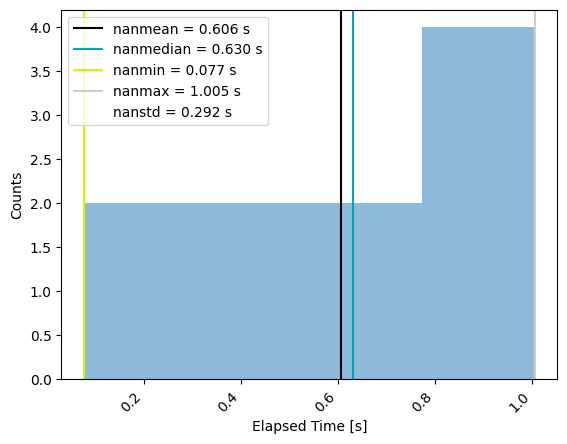

,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
7,get_execstats(),2023-06-13 14:57:58,2023-06-13 14:57:59,0 days 00:00:01,1.686668e+09,1.686668e+09,0.954932,__get_execstats()__,__get_execstats()__
8,get_execstats()1,2023-06-13 14:57:59,2023-06-13 14:58:00,0 days 00:00:01,1.686668e+09,1.686668e+09,1.005079,__get_execstats()__,__get_execstats()__
9,get_execstats()2,2023-06-13 14:58:00,2023-06-13 14:58:00,0 days 00:00:00,1.686668e+09,1.686668e+09,0.657043,__get_execstats()__,__get_execstats()__
10,get_execstats()3,2023-06-13 14:58:00,2023-06-13 14:58:01,0 days 00:00:01,1.686668e+09,1.686668e+09,0.603256,__get_execstats()__,__get_execstats()__
11,get_execstats()4,2023-06-13 14:58:01,2023-06-13 14:58:02,0 days 00:00:01,1.686668e+09,1.686668e+09,0.508941,__get_execstats()__,__get_execstats()__
12,get_execstats()5,2023-06-13 14:58:02,2023-06-13 14:58:02,0 days 00:00:00,1.686668e+09,1.686668e+09,0.820693,__get_execstats()__,__get_execstats()__
13,get_execstats()6,2023-06-13 14:58:02,2023-06-13 14:58:03,0 days 00:00:01,1.686668e+09,1.686668e+09,0.784715,__get_execstats()__,__get_execstats()__
14,get_execstats()7,2023-06-13 14:58:03,2023-06-13 14:58:03,0 days 00:00:00,1.686668e+09,1.686668e+09,0.076863,__get_execstats()__,__get_execstats()__
15,get_execstats()8,2023-06-13 14:58:03,2023-06-13 14:58:03,0 days 00:00:00,1.686668e+09,1.686668e+09,0.179365,__get_execstats()__,__get_execstats()__
16,get_execstats()9,2023-06-13 14:58:03,2023-06-13 14:58:04,0 days 00:00:01,1.686668e+09,1.686668e+09,0.469511,__get_execstats()__,__get_execstats()__


,Task,Start,End,Duration,Start_Seconds,End_Seconds,Duration_Seconds,Comment_Start,Comment_End
0,Global Task,2023-06-13 14:57:41,2023-06-13 14:57:47,0 days 00:00:06,1.686668e+09,1.686668e+09,5.588538,,
1,Subtask0,2023-06-13 14:57:41,2023-06-13 14:57:42,0 days 00:00:01,1.686668e+09,1.686668e+09,1.377301,,
2,Subtask1,2023-06-13 14:57:42,2023-06-13 14:57:43,0 days 00:00:01,1.686668e+09,1.686668e+09,0.980361,,
3,Subtask2,2023-06-13 14:57:43,2023-06-13 14:57:45,0 days 00:00:02,1.686668e+09,1.686668e+09,1.619006,,
4,Subtask3,2023-06-13 14:57:45,2023-06-13 14:57:45,0 days 00:00:00,1.686668e+09,1.686668e+09,0.385806,,
5,Subtask4,2023-06-13 14:57:45,2023-06-13 14:57:47,0 days 00:00:02,1.686668e+09,1.686668e+09,1.209774,,
6,Decorator Task,2023-06-13 14:57:47,2023-06-13 14:57:47,0 days 00:00:00,1.686668e+09,1.686668e+09,0.730379,timed_func,


In [16]:
ET.verbose = 0
@ET.get_execstats(n=10, metrics=None, drop_from_df_protocoll=True)
def evaluated_func():
    time.sleep(np.random.rand())
        
    return 'FINISHED'



ef = evaluated_func()

display(ef)

display(ET.df_protocoll)



# LogErrors

In [25]:
importlib.reload(errorlogging)

LE = errorlogging.LogErrors(verbose=1)

try:
    a = 1/0
except Exception as e:
    LE.print_exc(e, prefix='Pre', suffix='Suf')
    LE.exc2df( e, prefix='Pre', suffix='Suf')

LE.df_errorlog



Pre
Traceback (most recent call last):
  File "C:\Users\lukas\AppData\Local\Temp\ipykernel_34040\307047574.py", line 6, in <module>
    a = 1/0
ZeroDivisionError: division by zero

Suf


,exception,prefix,suffix,file,line,problem line,error msg,time
0,"Traceback (most recent call last):\n File ""C:...",Pre,Suf,C:\Users\lukas\AppData\Local\Temp\ipykernel_34...,6,a = 1/0,ZeroDivisionError: division by zero,2023-06-13 11:01:35.272477
